In [1]:
import pandas as pd
df = pd.read_csv("c:/data/customer/customer.csv")
print(df.head())

   Int'l Plan  VMail Plan  VMail Message  Day Mins  Day Calls  Day Charge  \
0           0           1             25     265.1        110       45.07   
1           0           1             26     161.6        123       27.47   
2           0           0              0     243.4        114       41.38   
3           1           0              0     299.4         71       50.90   
4           1           0              0     166.7        113       28.34   

   Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  \
0     197.4         99       16.78       244.7           91         11.01   
1     195.5        103       16.62       254.4          103         11.45   
2     121.2        110       10.30       162.6          104          7.32   
3      61.9         88        5.26       196.9           89          8.86   
4     148.3        122       12.61       186.9          121          8.41   

   Intl Mins  Intl Calls  Intl Charge  CustServ Calls  Churn  
0       10.

In [33]:
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 지속 || 1: 이탈)')

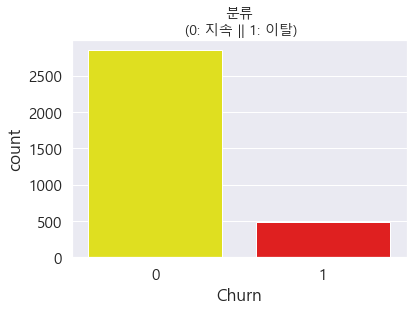

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
colors = ["yellow", "red"]
sns.countplot('Churn', data=df, palette=colors)
plt.title('분류\n (0: 지속 || 1: 이탈)',fontsize=14)

In [35]:
train_cols = df.columns[0:16]
X = df[train_cols]
y = df["Churn"]
print(type(X), type(y))
print(X.head())
print(y.head())

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
   Int'l Plan  VMail Plan  VMail Message  Day Mins  Day Calls  Day Charge  \
0           0           1             25     265.1        110       45.07   
1           0           1             26     161.6        123       27.47   
2           0           0              0     243.4        114       41.38   
3           1           0              0     299.4         71       50.90   
4           1           0              0     166.7        113       28.34   

   Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  Night Charge  \
0     197.4         99       16.78       244.7           91         11.01   
1     195.5        103       16.62       254.4          103         11.45   
2     121.2        110       10.30       162.6          104          7.32   
3      61.9         88        5.26       196.9           89          8.86   
4     148.3        122       12.61       186.9          121          8.41   



In [36]:
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Churn'])
df_samp=pd.concat([X_samp,y_samp],axis=1)


In [37]:
df_samp["Churn"].value_counts()

0    483
1    483
Name: Churn, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 지속 || 1: 이탈)')

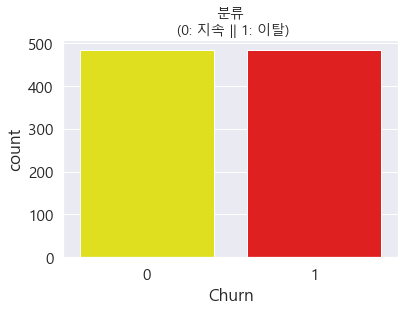

In [38]:
colors = ["yellow", "red"]
sns.countplot('Churn', data=df_samp, palette=colors)
plt.title('분류\n (0: 지속 || 1: 이탈)',fontsize=14)

In [39]:
train_cols = df_samp.columns[0:16]
X = df_samp[train_cols] 
y = df_samp["Churn"]

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=10)

In [41]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=7)
model.fit(X_train, y_train)

MLPClassifier(random_state=7)

In [42]:
import numpy as np
pred=model.predict(X_test)
print(model.score(X_train, y_train)) 
print(model.score(X_test, y_test)) 
print(np.mean(pred == y_test)) 

0.6730769230769231
0.5862068965517241
0.5862068965517241


In [43]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train
print(X_train_scaled.describe())
print(X_test_scaled.describe())

         Int'l Plan    VMail Plan  VMail Message      Day Mins     Day Calls  \
count  6.760000e+02  6.760000e+02   6.760000e+02  6.760000e+02  6.760000e+02   
mean   1.607853e-16 -1.527378e-16   1.668619e-16 -7.994920e-16  2.461049e-16   
std    1.000000e+00  1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00   
min   -4.571572e-01 -5.518769e-01  -5.335870e-01 -3.121540e+00 -4.836641e+00   
25%   -4.571572e-01 -5.518769e-01  -5.335870e-01 -6.292776e-01 -6.314072e-01   
50%   -4.571572e-01 -5.518769e-01  -5.335870e-01 -5.332612e-02  3.760733e-02   
75%   -4.571572e-01 -5.518769e-01  -5.335870e-01  7.249207e-01  7.066219e-01   
max    2.184196e+00  1.809318e+00   3.037748e+00  2.589945e+00  3.048173e+00   

         Day Charge      Eve Mins     Eve Calls    Eve Charge    Night Mins  \
count  6.760000e+02  6.760000e+02  6.760000e+02  6.760000e+02  6.760000e+02   
mean  -1.533988e-15 -1.216072e-15  1.018252e-16  3.295769e-15 -7.035792e-16   
std    1.000000e+00  1.000000e+00  1.00000

In [44]:
model = MLPClassifier(random_state=7)
model.fit(X_train_scaled, y_train)

C:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(random_state=7)

In [45]:
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

0.9038461538461539
0.8379310344827586


In [46]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm

array([[  0, 151],
       [  0, 139]], dtype=int64)

In [47]:
df_cm=pd.DataFrame(cm, index=[0, 1],columns=[0, 1])
df_cm

,0,1
0,0,151
1,0,139


<AxesSubplot:title={'center':'Confusion Matrix'}>

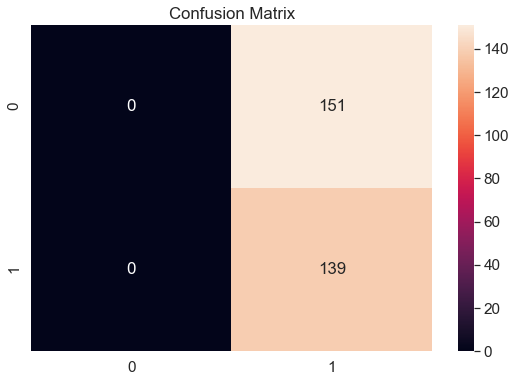

In [48]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True, fmt="d")